<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/introducci-n-al-Machine-Learning/blob/main/classes/class_1/class_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [1]:
import numpy as np 

In [2]:
import pandas as pd 

In [3]:
import matplotlib.pyplot as plt 

In [4]:
v = pd.read_csv('vivienda.csv') 

In [5]:
v.head()

,longitud,latitud,antiguedad,salas,habitaciones,población,hogares,ingresos,proximidad,valor
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0


In [6]:
v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   longitud      20640 non-null  float64
 1   latitud       20640 non-null  float64
 2   antiguedad    20640 non-null  float64
 3   salas         20640 non-null  float64
 4   habitaciones  20433 non-null  float64
 5   población     20640 non-null  float64
 6   hogares       20640 non-null  float64
 7   ingresos      20640 non-null  float64
 8   proximidad    20640 non-null  object 
 9   valor         20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
v.describe().ingresos

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: ingresos, dtype: float64

<AxesSubplot:>

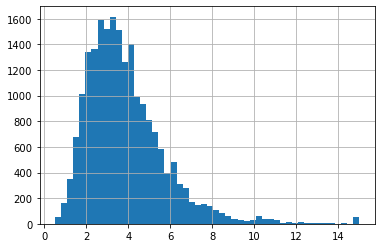

In [9]:
v.ingresos.hist(bins = 50)

In [10]:
v['ingresos_cat'] = pd.cut(v.ingresos, bins = [0,1.5, 3, 4.5, 6, np.inf], \
                          labels = [1,2,3,4,5])  

In [11]:
v.head(3)

,longitud,latitud,antiguedad,salas,habitaciones,población,hogares,ingresos,proximidad,valor,ingresos_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0,5


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [14]:
dividir = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42 ) 

In [15]:
for train_index, test_index in dividir.split(v, v.ingresos_cat):
    strat_train_set = v.loc[train_index]
    strat_test_set = v.loc[test_index] 

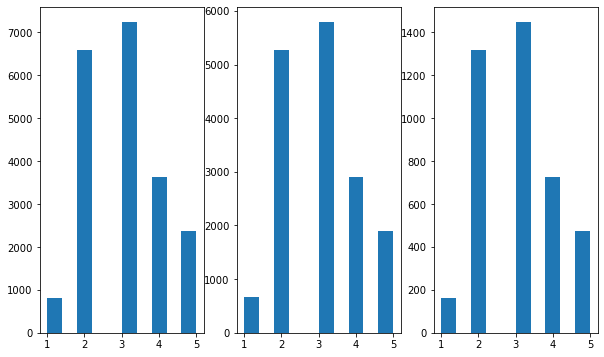

In [20]:
fig, ax = plt.subplots(1,3, figsize = (10,6)) 

ax[0].hist(v.ingresos_cat)
ax[1].hist(strat_train_set.ingresos_cat)
ax[2].hist(strat_test_set.ingresos_cat)

plt.savefig('div_entrenamiento_testeo_estratificado.jpg')

plt.show()
